# Regresión Lineal

Emplearemos el dataset `Peso y Consumo.xlsx`, en el cual la variable independiente representa el peso en Kg de un auto y la variable dependiente el consumo de gasolina x cada 100 Km.

Se trata de crear un modelo que permita estimar el consumo que tendrá un vehículo en función de su peso.

In [1]:
# #* Librerías a emplear
# #*--------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# #* --------------------------------------------------
# #* Modelo de regresión Lineal
# #* ---------------------------------------------------
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# #*---------------------------------------------------
# #* StatModel - OLS - Mínimos cuadrados ordinarios
# #*----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
# #*-------------------------------------------------
# #* Estandarizacion y escalado de predictores
# #*-------------------------------------------------
from sklearn.preprocessing import StandardScaler
# #*-------------------------------------------------
# #* Configuracion del tamanio de los graficos
# #*-------------------------------------------------
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
# #* Crea un dataframe de residuos

def crear_dat(x,labelx,y,labely,y_pred):
    dat = pd.DataFrame()
    dat[labelx] = x
    dat[labely] = y
    dat['Estimacion'] = y_pred   
    dat['Variacion'] = dat[labely] - dat['Estimacion']
    return dat

# #* Grafica los residuos

def grafica_error(y, y_pred):
    x1 = np.arange(len(y_pred))
    plt.scatter(x1, (y - y_pred), color='crimson')
    R2s = mean_squared_error(y, y_pred)
    print('MSE:', R2s)
    plt.plot([0,len(y_pred)],[R2s,R2s], color='green', ls='--')
    plt.plot([0,len(y_pred)],[-R2s,-R2s], color='green', ls='--')
    plt.plot([0,len(y_pred)],[0,0], 'b-')
    plt.title('Gráfica de residuos (MSE - Error cuadrático medio - $\\hat R^2_S$)')
    plt.xlabel('Instancias')
    plt.ylabel('Error');

def linea_ajuste(x,xlabel,y,ylabel,grado):
    plt.rcParams["figure.figsize"] = (8, 5)
    x1 = x[xlabel].values
    y1 = y[ylabel].values 
    modelo = np.poly1d(np.polyfit(x1,y1,grado))
    linea = np.linspace(min(x1), max(x1))
    plt.scatter(x1,y1, c='blue')
    plt.plot(linea, modelo(linea), 'crimson')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    r2 = r2_score(y1, modelo(x1))
    print('Exactitud del modelo: ', r2)

In [3]:
#cargamos los datos

datos = pd.read_excel("../MyPython/dataset/Peso y Consumo.xlsx")

datos = datos.drop("No", axis=1)

datos.columns = ['Peso', 'Consumo']

datos.head()

,Peso,Consumo
0,981,11
1,878,12
2,708,8
3,1138,11
4,1064,13


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Peso     30 non-null     int64
 1   Consumo  30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


Grafica de dispercion

Text(0.5, 1.0, 'Peso vs Consumo')

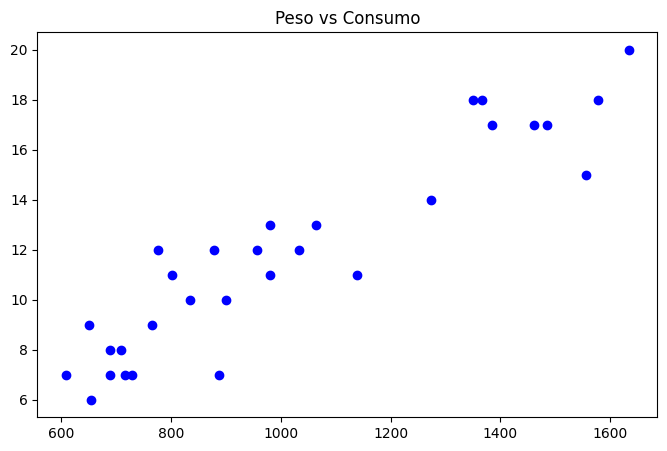

In [5]:
plt.scatter(x=datos['Peso'], y=datos['Consumo'], color='blue')
plt.title('Peso vs Consumo')

In [6]:
!pip install jinja2
!pip install openpyxl

In [7]:
#Correlacion entre las variables

datos.corr().style.highlight_max(color="blue")
# #*-------------------------------------------------

,Peso,Consumo
Peso,1.000000,0.928509
Consumo,0.928509,1.000000


<Axes: >

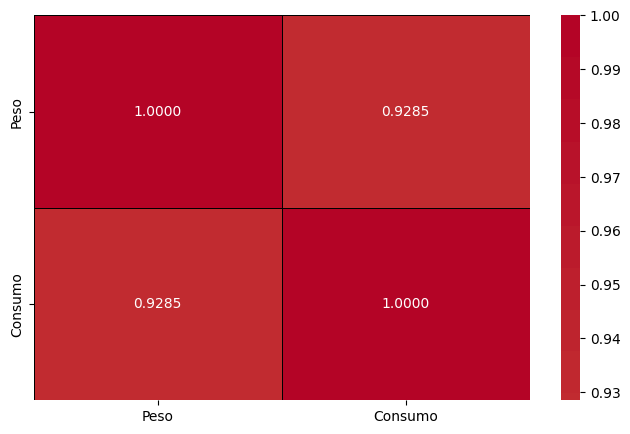

In [8]:
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', fmt='.4f')

Ajuste Polinomico - overfiting (sobre ajuste)

Exactitud del modelo:  0.8678685590563143


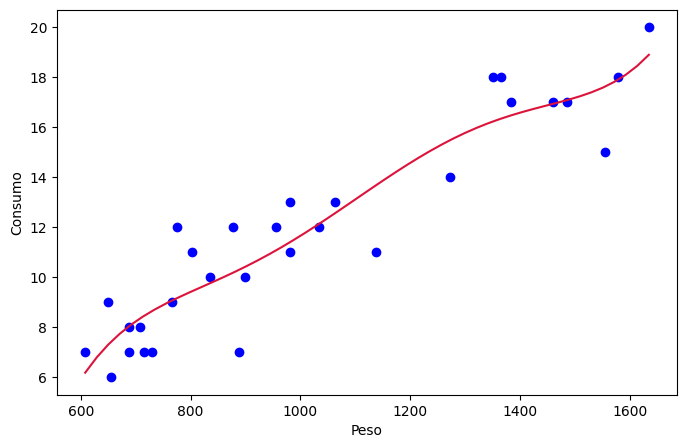

In [9]:

x = datos[["Peso"]]
y = datos[["Consumo"]]

linea_ajuste(x, 'Peso', y, 'Consumo', 5)

1. Trabajamos con todo el data set - 30 ejemplos



In [10]:
regresion = LinearRegression()
regresion.fit(x, y)
y_pred = regresion.predict(x)

print('Intercepto: ', regresion.intercept_)
print('Pendiente: ', regresion.coef_)
print('Coeficiente de determinacion: ', regresion.score(x,y))

Intercepto:  [-0.07126061]
Pendiente:  [[0.01173069]]
Coeficiente de determinacion:  0.8621293337804034


$$\Large \color{yellow}{\hat{y} = -0.0713 + 0.0117 * x}$$
$$\Large \color{green}{R^2 = 0.8621}

MSE: 2.2218623809433677


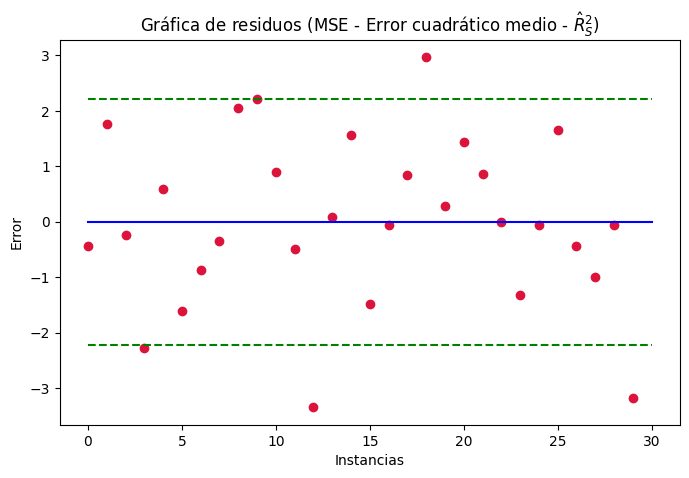

In [11]:
#Graficamos el error del residuo
dat = crear_dat(x, 'Peso', y, 'Consumo', y_pred)
grafica_error(dat['Consumo'], dat['Estimacion'])


In [12]:

dat[(dat['Variacion'] <= -2.22) | (dat['Peso'] >= -2.22)]

,Peso,Consumo,Estimacion,Variacion
0,981,11,11.436542,-0.436542
1,878,12,10.228281,1.771719
2,708,8,8.234064,-0.234064
3,1138,11,13.278259,-2.278259
4,1064,13,12.410188,0.589812
5,655,6,7.612338,-1.612338
6,1273,14,14.861902,-0.861902
7,1485,17,17.348807,-0.348807
8,1366,18,15.952855,2.047145
9,1351,18,15.776895,2.223105


Separamos en datos de entrenamiento y prueba

In [13]:
# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", len(x_train))
print("Tamaño del conjunto de prueba:", len(x_test))

Tamaño del conjunto de entrenamiento: 24
Tamaño del conjunto de prueba: 6


In [14]:

regresion = LinearRegression()
regresion.fit(x_train, y_train)


y_pred_test = regresion.predict(x_test)


r2_test = r2_score(y_test, y_pred_test)


print("Coeficiente de determinación (R^2) en prueba:", r2_test)


Coeficiente de determinación (R^2) en prueba: 0.8649297177982919
